## Getting Data

In [1]:
import pandas as pd
import random

In [2]:
# Dataset source: https://huggingface.co/datasets/ronaldahmed/scitechnews
df_train = pd.read_json('data/train.json', lines=True)
df_train

,id,pr-title,pr-article,pr-summary,sc-title,sc-abstract,sc-section_names,sc-sections,sc-article,sc-authors
0,0,New York City's Vaccine Passport Plan Renews O...,When New York City announced on Tuesday that i...,New York's City's mandate that people must sho...,,,[],[],,[]
1,1,Facebook Disables Accounts Tied to NYU Researc...,Facebook Inc. has disabled the personal accoun...,Facebook has disabled the personal accounts of...,,,[],[],,[]
2,2,Teenage Girls in Northern Nigeria 'Open Their ...,"KANO, Nigeria, Aug 2 (Reuters) - Teenage girls...",The Kabara non-governmental organization (NGO)...,,,[],[],,[]
3,3,3D 'Heat Map' Animation Shows How Seizures Spr...,"For 29 years, from the time she was 12, Rashet...","University of California, San Francisco (UCSF)...",,,[],[],,[]
4,4,Endlessly Changing Playground Teaches AIs to M...,What did they learn? Some of DeepMind's XLand ...,Alphabet's DeepMind Technologies has developed...,,,[],[],,[]
...,...,...,...,...,...,...,...,...,...,...
26633,29065,Young People Get Their Knowledge of Tech From ...,,"A survey of 1,000 16- to 21-year-olds in the U...",,,[],[],,[]
26634,29067,TUM Team ASIC Implements Post-Quantum Cryptogr...,,A team of researchers at Germany's Technical U...,,,[],[],,[]
26635,29070,3D Concrete Printing Robots Cut Rail Construct...,,Britain will employ robotic three-dimensionall...,,,[],[],,[]
26636,6496,'Listening' Drone Helps Find Victims Needing R...,As part of the ImPACT Tough Robotics Challenge...,Researchers in Japan say they have developed t...,,,[],[],,[]


In [3]:
df_train = df_train[['pr-title', 'pr-article']]
df_train

,pr-title,pr-article
0,New York City's Vaccine Passport Plan Renews O...,When New York City announced on Tuesday that i...
1,Facebook Disables Accounts Tied to NYU Researc...,Facebook Inc. has disabled the personal accoun...
2,Teenage Girls in Northern Nigeria 'Open Their ...,"KANO, Nigeria, Aug 2 (Reuters) - Teenage girls..."
3,3D 'Heat Map' Animation Shows How Seizures Spr...,"For 29 years, from the time she was 12, Rashet..."
4,Endlessly Changing Playground Teaches AIs to M...,What did they learn? Some of DeepMind's XLand ...
...,...,...
26633,Young People Get Their Knowledge of Tech From ...,
26634,TUM Team ASIC Implements Post-Quantum Cryptogr...,
26635,3D Concrete Printing Robots Cut Rail Construct...,
26636,'Listening' Drone Helps Find Victims Needing R...,As part of the ImPACT Tough Robotics Challenge...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26638 entries, 0 to 26637
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pr-title    26638 non-null  object
 1   pr-article  26638 non-null  object
dtypes: object(2)
memory usage: 416.3+ KB


In [5]:
df_train = df_train[df_train['pr-article'] != '']
print('Train dataframe size without blanks: ', len(df_train))

Train dataframe size without blanks:  12735


In [6]:
random_article_idx = random.randint(0, len(df_train))
row = df_train.iloc[random_article_idx]
print('News example: ', random_article_idx)
print('Title:    \n', row['pr-title'])
print('Article:  \n', row['pr-article'])

News example:  9955
Title:    
 Creating Ag Extension Agent for Cyber
Article:  
 Eugene Spafford, executive director of Purdue University's Center for Education and Research in Information Assurance and Security, sees Congress' committee structure as a deterrent in getting cybersecurity legislation passed. Various committees in both houses claim jurisdiction over different aspects of IT security, and intra-house squabbling can cause a bill to get lost on its way to becoming law. "Each one of these committees wants to have jurisdiction of some kind over anything that's done in cybersecurity, and this crosses party lines and has been an impediment in previous years," Spafford says in an interview with GovInfoSecurity.com's Eric Chabrow (transcript below). In the current Congress, however, Spafford sees a greater focus in both houses to try and pull members together. Senate Majority Leader Harry Reid, D-Nev., has asked the chairmen of various committees with IT security oversight to come

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

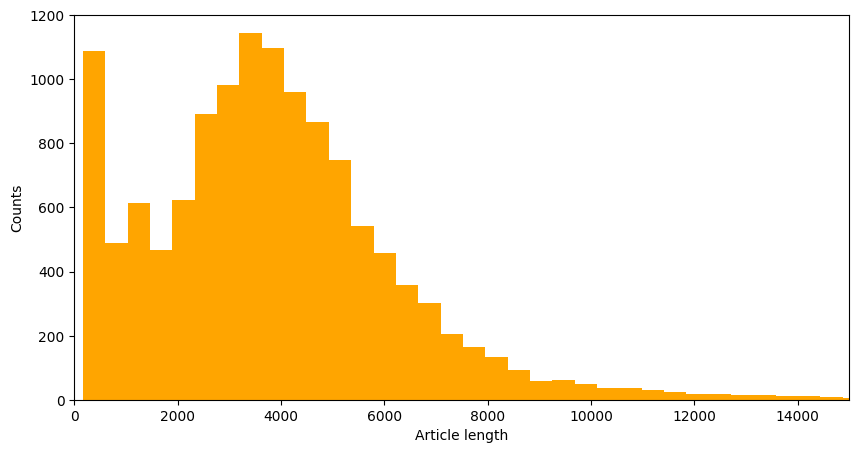

In [10]:
article_lengths = df_train['pr-article'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(article_lengths, bins=150, color='orange')
plt.xlim(0, 15000)
plt.xlabel('Article length')
plt.ylabel('Counts')

## Tokenizing and preprocessing data

In [12]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
import torch

display_model_info = 1

model_name = "t5-large"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [13]:
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)
model.eval()
tokenizer = T5Tokenizer.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [14]:
if display_model_info:
    print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

Model presents 24x Encoder blocks and 24x Decoder blocks.

In [15]:
if display_model_info:
    print(model.config)

T5Config {
  "_attn_implementation_autoset": true,
  "_name_or_path": "t5-large",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_sto

In [16]:
special_tokens = tokenizer.special_tokens_map
special_tokens.pop('additional_special_tokens')
print(special_tokens)

{'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}


In [17]:
import textwrap

In [52]:
def get_title_for_news(article, max_length=30, min_length=5, trim_period=True):
    t5_input = "summarize: " + article# + " </s>"
    tokenized_t5_input = tokenizer.encode(t5_input,
                                          return_tensors="pt",
                                          truncation=True,
                                          max_length=model.config.n_positions
                                          ).to(device)
    title_ids = model.generate(tokenized_t5_input,
                               max_length=max_length,
                               min_length=min_length,
                               num_beams=4,
                               early_stopping=True)
    title = tokenizer.decode(title_ids[0], skip_special_tokens=True)
    if trim_period:
        titles = title.split('.')
        title = titles[0]
    return title

In [43]:
def print_article_titles(article_idx):
    article = df_train['pr-article'].iloc[article_idx]
    official_title = df_train['pr-title'].iloc[article_idx]

    print('Article:')
    print(textwrap.fill(article, 120, initial_indent='    ', subsequent_indent='    '))
    print('\nOfficial title:')
    print(textwrap.fill(official_title, 120, initial_indent='    ', subsequent_indent='    '))

    model_title = get_title_for_news(article,
                                     min_length=5,
                                     max_length=30)

    print('\nModel title:')
    print(textwrap.fill(model_title, 120, initial_indent='    ', subsequent_indent='    '))


In [44]:
print_article_titles(500)

Article:
    More than half of IT workers in the UK and Ireland say their companies are trying to tackle gender diversity in IT
    departments, according to research by Computer Weekly. The annual Computer Weekly/TechTarget IT salary survey asked
    IT workers which topics related to diversity their IT departments were working to address in 2020 and found 67% said
    their firms were working on gender diversity . But only 29% said their company had a plan in place to help improve
    the balance of men and women in their tech teams. Ruth Blanco, communications director for WISE, the campaign for
    greater gender balance in science, technology, engineering and mathematics (STEM), which has resources available to
    help companies address diversity better, said: "While it is reassuring that the majority of IT workers say gender
    diversity is something their workplace is addressing, it is telling that only 29% say there is a plan in place. We
    know that diversity and inclusion

In [45]:
print_article_titles(1310)

Article:
    "Pre-pandemic, people might have thought we were automating too much," said Richard Pak, a professor at Clemson
    University who researches the psychological factors around automation. "This event is going to push people to think
    what more should be automated." The grocery industry is leaning more on automation to free up employees to deal with
    the crush of demand during the pandemic. Brain Corp, a San Diego company that makes software used in automated floor
    cleaners, said retailers were using the cleaners 13 percent more than they were just two months ago. The "autonomous
    floor care robots" are doing about 8,000 hours of daily work "that otherwise would have been done by an essential
    worker," the company said.

Official title:
    Robots Welcome to Take Over, as Pandemic Accelerates Automation

Model title:
    "pre-pandemic, people might have thought we were automating too much," professor says


In [46]:
print_article_titles(1106)

Article:
    As people age, cognitive decline can happen in subtle ways that are not always immediately obvious to family members
    or friends. One solution for better detecting these subtle changes, however, could already be in the homes of many
    people, in the form of a smart home device. In a recent study , researchers demonstrate that it's possible to use
    data from smart home devices to detect behavioral differences between people who are experiencing cognitive decline
    and healthy individuals. The results, which could have broader implications for the monitoring of many different
    health conditions, were published 3 June in IEEE Journal of Biomedical and Health Informatics . Gina Sprint, an
    Assistant Professor of Computer Science at Gonzaga University, is one of the researchers involved in the study.
    Sprint and her collaborators at Washington State University developed a novel algorithm for analyzing data from
    smart home devices; it's called Behavior Cha

Down here the models predicts something wrong until the first period:

In [53]:
print_article_titles(2002)

Article:
    Advocates for closing the gender gap in computer science say part of the solution isn't necessarily increasing the
    number of classes that K-12 schools offer - it's getting districts to report who's taking them. The nonprofit Girls
    Who Code is working with Sen. Jacky Rosen (D-Nev.) on legislation that would require schools receiving federal
    funding for computer science programs to disclose to the Department of Education the number and percentage of
    students who participate in computer science courses, as well as their gender, race and other demographic
    information. With that transparency, it becomes more clear who's signing up for classes that lay the groundwork for
    careers in technology - and whether federal grant programs are making a difference. The broader aim is to help girls
    think of themselves as smart at science and tech, defying preconceived notions. "We have open jobs. If we don't work
    harder to include women in tech ... there's no 

In [54]:
print_article_titles(2004)

Article:
    Annie Slattery's start-up ConX connects contractors in the construction industry online and enables them to find
    work. Annie Slattery, an entrepreneur who is originally from Clontarf in north Dublin, has received a top award in
    Australia for women in tech start-ups. Slattery was presented with the award at Hopper Down Under, which was held in
    Australia for the first time last week. The event is part of the Grace Hopper Celebration , which is named after
    computer scientist Grace Hopper and is the world's largest gathering of women in computing and tech. Slattery
    received the award for her start-up ConX, which connects contractors in the construction industry online, with the
    aim of changing how construction contractors can find and win work. Siliconrepublic.com spoke to ConX's former CIO ,
    David Stenson, about the technology behind the start-up in September 2015. The award was part of a pitch
    competition, which saw more than 100 women pitchin

In [48]:
torch.cuda.empty_cache()